In [36]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.datasets import mnist
from keras.utils import plot_model
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping

In [31]:


labels=['shoe','dress','shoe','t-shirt','shoe','t-shirt','shoe','dress']

categories = np.array(['t-shirt','dress','shoe'])

n_categories=3

ohe_labels=np.zeros((len(labels),n_categories))

for ii in range(len(labels)):
    jj=np.where(categories==labels[ii])
    ohe_labels[ii,jj]=1
    
print(ohe_labels)

[[0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


In [32]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

(60000, 28, 28)
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 50)                39250     
_________________________________________________________________
dense_17 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_18 (Dense)             (None, 10)                510       
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


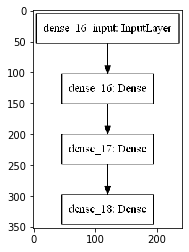

In [41]:
model=Sequential()

print(X_train.shape)

#28x28 pixels=784 pixels
model.add(Dense(50, activation='relu', input_shape=(784,)))

model.add(Dense(50,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

plot_model(model, to_file='model.png')
img=plt.imread('model.png')
plt.imshow(img)
plt.show()

In [47]:
#X_train = X_train.reshape((X_train.shape[0], 784))
#X_test = X_test.reshape((X_test.shape[0], 784, 1))

#y_train=to_categorical(Y_train)
#y_test=to_categorical(Y_test)

#print(Y_train)

#model.fit(X_train,y_train, epochs=3)

trainX = X_train.reshape((X_train.shape[0], 784))
testX = X_test.reshape((X_test.shape[0], 784))

trainY=to_categorical(Y_train)
testY=to_categorical(Y_test)

early_stopping_monitor=EarlyStopping(patience=2)

print(trainX.shape)
model.fit(trainX, trainY, validation_split=0.2,callbacks=[early_stopping_monitor],epochs=3)

(60000, 784)
Train on 48000 samples, validate on 12000 samples
Epoch 1/3
48000/48000 [==============================] - 2s 52us/step - loss: 0.1592 - accuracy: 0.9555 - val_loss: 0.2120 - val_accuracy: 0.9479
Epoch 2/3
48000/48000 [==============================] - 2s 52us/step - loss: 0.1537 - accuracy: 0.9564 - val_loss: 0.2036 - val_accuracy: 0.9473
Epoch 3/3
48000/48000 [==============================] - 2s 45us/step - loss: 0.1510 - accuracy: 0.9561 - val_loss: 0.2187 - val_accuracy: 0.9496


In [49]:
model.evaluate(testX,testY)

#evaluate - outputs the loss and the accurancy

10000/10000 [==============================] - 0s 25us/step


[0.2237051248544827, 0.9491999745368958]